In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/PCOS_data_without_infertility.csv')
dataset

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


# Exploratory Data Analysis

In [ ]:
yes_count, _ = dataset[dataset['PCOS (Y/N)']==1].shape
no_count, _ = dataset[dataset['PCOS (Y/N)']==0].shape
print(f'Yes Count : {yes_count} | No count : {no_count}')
print(f'PCOS DATASET {dataset.shape}')

Yes Count : 177 | No count : 364
PCOS DATASET (541, 45)


No handles with labels found to put in legend.


Number of Data Point (Rows) : 541
Number of Features (Columns) : 45


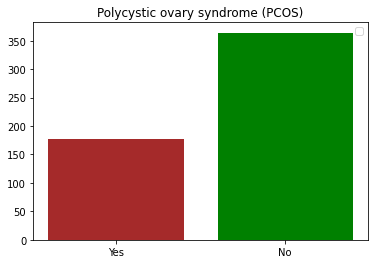

In [ ]:
import matplotlib.pyplot as plt
rows , columns = dataset.shape
print(f'Number of Data Point (Rows) : {rows}')
print(f'Number of Features (Columns) : {columns}')

no, yes = dataset['PCOS (Y/N)'].value_counts()

x_bar = ['Yes', 'No']
y_bar = [yes,no]

plt.title('Polycystic ovary syndrome (PCOS)')
plt.bar(x_bar, y_bar, color=['brown', 'green'])
plt.legend()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

# DATA CLEANING AND PRE-PROCESSING

In [ ]:
dataset.drop(columns=['Sl. No', 'Patient File No.', 'Unnamed: 44'], inplace=True)
# dataset.head(3)
X = dataset.drop(columns=['PCOS (Y/N)'])
y = dataset['PCOS (Y/N)']

In [ ]:
X.shape

(541, 41)

In [ ]:
X['II    beta-HCG(mIU/mL)'] = pd.to_numeric(X['II    beta-HCG(mIU/mL)'], errors='coerce').fillna(0).astype(int)
X['AMH(ng/mL)'] = pd.to_numeric(X['AMH(ng/mL)'], errors='coerce').fillna(0).astype(int)
# X['TSH (mIU/L)'] = pd.to_numeric(X['TSH (mIU/L)'], errors='coerce').fillna(0).astype(int)

In [ ]:
# X.info()

In [ ]:
X['Marraige Status (Yrs)'] = X['Marraige Status (Yrs)'].fillna(method='ffill')
X['Fast food (Y/N)'] = X['Fast food (Y/N)'].fillna(method='ffill')

# Min Max Scalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

for col in X.columns:
   if (X[col].values.max()) != 1:
     X[col] = scalar.fit_transform(X[[col]])


In [ ]:
X.head(3)

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0.285714,0.176623,0.348837,0.259878,0.571429,0.942029,0.500000,0.314286,0.0,0.416667,...,0,1.0,0,0.765625,0.782609,0.136364,0.15,0.750,0.750000,0.472222
1,0.571429,0.441558,0.569767,0.472141,0.571429,0.884058,0.333333,0.507937,0.0,0.416667,...,0,0.0,0,0.843750,0.673913,0.136364,0.25,0.625,0.583333,0.205556
2,0.464286,0.490909,0.651163,0.485347,0.000000,0.855072,0.166667,0.523810,0.0,0.416667,...,1,1.0,0,0.843750,0.782609,0.590909,0.75,0.750,0.833333,0.555556


In [ ]:
# X.columns

# FEATURE EXTRACTION PROCESS

# LASSO REGULARIZATION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
# from sklearn import selecte

# set the regularization paramter c=1
logistic = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=7).fit(X,y)
model = SelectFromModel(logistic, prefit=True)

x_new = model.transform(X)
print(x_new)

select_colum = X.columns[X.var() > 0.004]
print('Number of column: ' , len(select_colum))
print('colums :  ' , select_colum)

# Dropped colums have value of all 0s, keep other columns 
# select_columns = selected_features.columns[selected_features.var() != 0]
# select_colums


[[0.28571429 0.         0.23333333 ... 0.765625   0.13636364 0.15      ]
 [0.57142857 0.         0.36666667 ... 0.84375    0.13636364 0.25      ]
 [0.46428571 0.         0.33333333 ... 0.84375    0.59090909 0.75      ]
 ...
 [0.57142857 0.         0.26666667 ... 0.765625   0.04545455 0.        ]
 [0.25       0.66666667 0.06666667 ... 0.765625   0.31818182 0.3       ]
 [0.10714286 0.66666667 0.06666667 ... 0.84375    0.40909091 0.5       ]]
Number of column:  33
colums :   Index([' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group',
       'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)',
       'No. of aborptions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'AMH(ng/mL)',
       'PRL(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


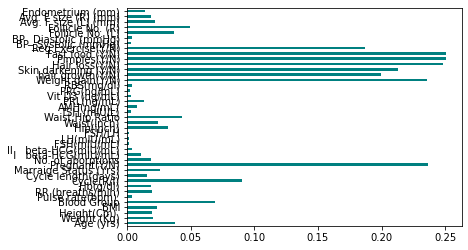

<Figure size 1417.32x708.661 with 0 Axes>

<Figure size 1417.32x708.661 with 0 Axes>

In [ ]:
def cm_to_inch(value):
    return value/2.54
lasso_feature = pd.Series(X.var(), X.columns)
lasso_feature.plot(kind='barh', color='teal')
plt.show()
plt.figure(figsize=(cm_to_inch(50), cm_to_inch(25)))


In [ ]:
data = X[select_colum]
data.shape

(541, 33)

# DATA BALANCING

# 4. Random over-sampling with imblearn

In [ ]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variablex_ros
X_balance , y_balance = ros.fit_resample(data, y)

y_balance.value_counts()

0    364
1    364
Name: PCOS (Y/N), dtype: int64

# PEARSON'S CORRELATION FEATURE

In [ ]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
X, y = make_regression(n_samples=100, n_features=100, n_informative=10)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=24)
# apply feature selection
X_selected = fs.fit_transform(X_balance, y_balance)
print(X_selected.shape)

(728, 24)


In [ ]:
y_balance[350] == y[350]

IndexError: ignored

# 6. Synthetic Minority Oversampling Technique (SMOTE)


In [ ]:
# # import library
# from imblearn.over_sampling import SMOTE

# smote = SMOTE()

# # fit predictor and target variable
# X_balance , y_balance = smote.fit_resample(data, y)


# MODEL TRAINING 

In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data, y) 
# X_train, X_test, y_train, y_test = train_test_split(X_balance, y_balance) 
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_balance) 

In [ ]:
print(f'X train : {X_train.shape}')
print(f'X test : {X_test.shape}')
print(f'y train : {y_train.shape}')
print(f'y test : {y_test.shape}')

X train : (546, 24)
X test : (182, 24)
y train : (546,)
y test : (182,)


# ENSEMBLE RANDOM CLASSIFIER




In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_classifier.score(X_test, y_test)

0.978021978021978

# MODEL  TESTING AND EVALUTION

In [ ]:
from sklearn.metrics import classification_report

prediction = rf_classifier.predict(X_test)
report = classification_report(y_test, prediction)
report

In [ ]:
#               precision    recall  f1-score   support

#            0       0.99      0.96      0.98        84
#            1       0.97      0.99      0.98        98

#     accuracy                           0.98       182
#    macro avg       0.98      0.98      0.98       182
# weighted avg       0.98      0.98      0.98       182


In [ ]:
# !pip install --target=$nb_path scikit-plot

# CONFUSION MATRIX

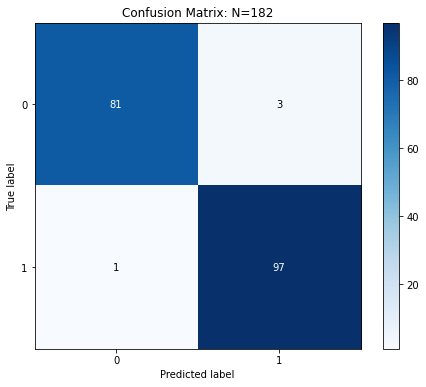

In [ ]:
# confusion matrix
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(y_test, prediction,
                      figsize=(8,6),
                      title=f'Confusion Matrix: N={len(y_test)}',
                      normalize=False); 